# Notebook by Ivaylo and Aleksandar

# Programming Lesson and Exercises - DMM<span class="tocSkip"></span>

These programming lessons do not require prior programming experience.

The goal is to teach you the use of _Python 3_ and the _Jupyter Notebook_ software
in the context of _Data Analytics_.

<div class="alert-info alert" role="alert-info">While you read this notebook,
execute all code cells in linear order
from the beginning</div>


# Introduction to this template notebook


You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Learning-Objectives-of-This-Lesson" data-toc-modified-id="Learning-Objectives-of-This-Lesson-0.1">Learning Objectives of This Lesson</a></span></li><li><span><a href="#Loading-the-libraries" data-toc-modified-id="Loading-the-libraries-0.2">Loading the libraries</a></span></li><li><span><a href="#Data-sets" data-toc-modified-id="Data-sets-0.3">Data sets</a></span></li></ul></li><li><span><a href="#1.-Linear-Regression" data-toc-modified-id="1.-Linear-Regression-1"><span class="section" id="linear_regression_simple">1.</span> Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Exercises-on-linear-regression" data-toc-modified-id="Exercises-on-linear-regression-1.1">Exercises on linear regression</a></span></li></ul></li><li><span><a href="#2.-Clustering" data-toc-modified-id="2.-Clustering-2"><span class="section">2.</span> Clustering</a></span><ul class="toc-item"><li><span><a href="#Exercises-on-clustering" data-toc-modified-id="Exercises-on-clustering-2.1">Exercises on clustering</a></span></li></ul></li><li><span><a href="#3.-Decision-Tree-Mining" data-toc-modified-id="3.-Decision-Tree-Mining-3"><span class="section">3.</span> Decision Tree Mining</a></span><ul class="toc-item"><li><span><a href="#Exercises-on-decision-trees" data-toc-modified-id="Exercises-on-decision-trees-3.1">Exercises on decision trees</a></span></li></ul></li><li><span><a href="#4.-Accuracy-and-Confusion-Matrix" data-toc-modified-id="4.-Accuracy-and-Confusion-Matrix-4"><span class="section">4.</span> Accuracy and Confusion Matrix</a></span><ul class="toc-item"><li><span><a href="#Exercises-on-accuracy-scores-and-confusion-matrices" data-toc-modified-id="Exercises-on-accuracy-scores-and-confusion-matrices-4.1">Exercises on accuracy scores and confusion matrices</a></span></li></ul></li><li><span><a href="#5.-Exercise:-Different-models-for-linear-regression" data-toc-modified-id="5.-Exercise:-Different-models-for-linear-regression-5"><span class="section">5.</span> Exercise: Different models for linear regression</a></span></li><li><span><a href="#6.-Exercise:-Depths-of-decision-trees" data-toc-modified-id="6.-Exercise:-Depths-of-decision-trees-6"><span class="section">6.</span> Exercise: Depths of decision trees</a></span></li></ul></div>

## Learning Objectives of This Lesson

After this lesson, you should

* know how to do **linear regression** on data frames
* know how to do **k-means clustering** on data frames
* know how to do **decision tree mining** on data frames
* know how to determine the **$R^2$ quality** parameter of a linear model
* know how to determine the **accuracy** and **confusion matrix** of a prediction

## Loading the libraries

To show examples, we load some Data Analytics libraries first:

In [42]:
import numpy as np  # import auxiliary library, typical idiom
import pandas as pd  # import the Pandas library, typical idiom

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

Now, we selectively import the relevant classes and functions from `sklearn`
(_SciKit Learn_, a Python library for machine learning). Its documentation can be found here: http://scikit-learn.org/.

In [44]:
from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.cluster import KMeans  # for clustering
from sklearn.tree import DecisionTreeClassifier  # for decision tree mining
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
#from treeviz import tree_print  # to print decision tree
#import treeviz
from sklearn.tree import plot_tree # to replace treeviz

### Warning:

* Data mining methods are often **non-deterministic**. This means that some of the data mining methods can return different answers every time they are executed, even when the same input data is used.

## Data sets

Throughout this notebook we will use two main data sets. The data mining techniques will be introduced using a synthetic **example data set**, while in many of the exercises you will work on the **Auto MPG data set**.

### Example data set

In order to show you how to use the Scikit Learn Python libraries to do the data mining, we will illustrate the use of the techniques on a running example:
a small idealized data set.
It does not matter how this is generated.

The example data set has two numeric columns labeled `'a'` and `'b'`,
and twelve rows.

In [23]:
df_sk = pd.DataFrame([[0, 1], [1, 2], [2, 1], [3, 3], [4, 2], [5, 3], [4, 7],
                      [5, 8], [6, 7], [7, 9], [8, 8], [9, 9]],
                        columns=['a', 'b'])
df_sk

,a,b
0,0,1
1,1,2
2,2,1
3,3,3
4,4,2
5,5,3
6,4,7
7,5,8
8,6,7
9,7,9


Here is a scatter plot:

In [ ]:
df_sk.plot(kind='scatter', x='a', y='b', s=50, c='r');

This reveals some structure in the data.

### Auto MPG data set

In the exercises you will apply the data mining techniques to find patterns in a data set containing information about the fuel efficiency of cars.

The original Auto MPG data set for these exercises can be accessed at
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/.
It explores the fuel efficiency of cars, measured in Miles Per Gallon (MPG):
the higher this number, the more efficient the car.
Some background information is available in http://lib.stat.cmu.edu/datasets/cars.desc.

Here is a summary of the columns:

1. mpg:           continuous; [fuel efficiency in miles per gallon; higher value is more efficient]
2. cylinders:     multi-valued discrete [number]
3. displacement:  continuous [volume of cylinders; in cubic inches]
4. horsepower:    continuous [engine power; in hp]
5. weight:        continuous [car mass; in lbs]
6. acceleration:  continuous [time to accelerate from 0 to 60 mph; in s; higher value is less acceleration]
7. year:    multi-valued discrete [last two digits of the year]
8. origin:        multi-valued discrete [1. American, 2. European, 3. Japanese]
9. name:      string (make and model; not unique)

We have cleaned the set for you, so that it is easier to analyze.
See the file `auto-mpg-clean.csv`.

#### Training and test data set

In the exercises we will use the data to make predictions about the fuel efficiency of a car based on its weight. We would ideally like to test the predictions on new cars. To simulate this type of testing, one often divides the whole data set into a _training set_ and a _test set_. The models are then fit using the _training set_ alone, and the predictions are evaluated using the test set.

In the next code cell, we load the full data set into the data frame `df_mpg`. Next, we use the built-in `sklearn` function `train_test_split()` to split the data into data frames `df_mpg_train` and `df_mpg_test`. We will use the former for training the models, and the latter for testing.

In [50]:
df_mpg = pd.read_csv('data/auto-mpg.csv')
df_mpg_train, df_mpg_test = train_test_split(df_mpg, test_size=0.2, random_state=42)

df_mpg_train.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.608176,5.430818,191.904088,102.849057,2969.015723,15.639937,76.103774
std,7.930574,1.684947,102.983802,37.261069,840.617729,2.763269,3.603177
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,98.500000,75.000000,2220.000000,13.900000,73.000000
50%,22.450000,4.000000,148.500000,91.500000,2822.500000,15.500000,76.000000
75%,29.725000,6.000000,259.500000,120.000000,3597.250000,17.300000,79.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000


Consider the following columns:

* mpg, cylinders, displacement, horsepower, weight, acceleration

Which correlations do you expect?

You can check your expectations against the following scatter plots.

In [ ]:
pd.plotting.scatter_matrix(df_mpg_train[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']],
                           diagonal='kde', figsize=(10, 10));

# <span class="section" id="linear_regression_simple">1.</span> Linear Regression

The goal of _linear regression_ is to come up with a _linear model_ that best fits the data.
It is a _supervised learning_ method
that seeks to 'explain' the dependent variable(s) from the explanatory variable(s)
by a _linear model_.

> **Note**:
> The term _variable_ means something else in statistics than in programming.
> A (statistical) variable is any characteristic,
> number, or quantity that can be measured or counted.
> Its value can vary from individual to individual in the population.
>
> In statistics, we distinguish _independent_ or _explanatory_ variables and
> _dependent_ variables.
> The value of _dependent_ variables are considered to be influenced by the
> values of the _explanatory_ variables.

In this lesson,
we will use the **Ordinary Least Squares** (OLS) algorithm for linear regression.
It is deterministic.

If you are interested in more details,
then you can consult the SciKit Learn documentation:

* [Ordinary Least Squares algorithm](http://scikit-learn.org/stable/modules/linear_model.html)
* [the `sklearn.linear_model.LinearRegression` object](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In the case of our example data set,
we see a tendency that larger values of `a` correspond to larger values of `b`,
and vice versa.

Can we quantify this relationship?

### Step 1. Select the data

Because linear regression is a supervised learning method,
we need to split the data into an explanatory variable and a dependent variable.

In this example,
we (fairly arbitrarily) _choose_ `a` to be the _independent_ (or _explanatory_) variable
and `b` the _dependent_ (or _response_) variable.
In real-life applications,
it is often more obvious how to make that distinction.

We select the data as follows for linear regression:

In [ ]:
X_reg = df_sk[['a']].copy()  # independent/explanatory variable; just one column in this case
y_reg = df_sk[['b']].copy()  # dependent/response variable; just one column

It is good practice to copy the data (as we have done above).
That way, you will not accidentally modify the original data,
when you start to play around with the selected data
(e.g., to assess the quality of the mined model).

> **NOTE:** `X_reg` and  `y_reg` should be data frames, even if they contain only one column (therefore the double square brackets in `df_sk[['a']]`).

> **NOTE:** In case of **multiple explanatory variables**, the `X_reg` data frame will contain several columns, one for each variable (e.g. `X_reg = df[['a', 'b', 'c']].copy()`).

### Step 2. Create the regression object

Next, we create the _regression object_ for **linear regression**,
and store it in the variable `reg`.
We do not need to supply any parameters;
the default values suffice.

In [ ]:
reg = LinearRegression()

Note that the order of Steps 1 and 2 does not matter.

### Step 3. Fit the model

Invoke the **`fit()`** function of the regression object,
supplying the selected data:

In [ ]:
reg.fit(X_reg, y_reg);

The result that is shown
``` python
LinearRegression(...)
```

is not interesting;
it shows the parameters, which in our case are all default values.
You could suppress that output by appending a semicolon ('**`;`**').

The regression object now 'knows' the best linear model for the given data.

### Step 4.a. Extract model parameters

The regression object 'holds' the model parameters that it determined.
These parameters can be accessed via various attributes of the miner object.
In case of a linear regression miner `reg`,
the relevant attributes are:

* **`reg.coef_`** : the _coefficient(s)_, one for each of the independent features
* **`reg.intercept_`** : the _intercept(s)_, that is, the constant term (additive offset)

Thus, the linear model has the form

```
y = coef_ * X + intercept_
```

For our example data, we get the following coefficient and intercept:

In [ ]:
reg.coef_, reg.intercept_

### Step 4.b. Visualize the model

In the case of a linear model where we have one independent feature and one dependent feature,
we can visualize that model as a _line_ in the scatter plot.

For higher dimensional linear models (when there are multiple independent features),
such a visualization is more complex (outside the scope of these lessons).

Visualizing this line could be done on the basis of the extracted _coefficient_ and _intercept_. However, for the specific case of a single explanatory variable and a single dependent variable,
Seaborn offers the function **`regplot()`** that produces a **scatter plot with regression line**.

In [ ]:
sns.regplot(x=X_reg['a'], y=y_reg['b'], line_kws={'color':'orange'}, ci=None);

By providing the argument `line_kws={'color':'orange'}`, we set the color of the line to orange.

We also provided the argument `ci = None`, to indicate that Seaborn should not draw a confidence interval (we will learn this later in the course). 

Note that this way of plotting the regression line does not use the regression object. Rather, Seaborn just recomputes the parameters for the linear regression from the data.

### Step 4.c. Assess the model's quality

There are various ways to assess the quality of a linear model.
One common way is to look at the value for $R^2$,
also known as the _coefficient of determination_.
The best value for $R^2$ is 1.0;
it can also take on any smaller value, including negative values.

$R^2$ can be computed as follows:

In [ ]:
R2 = reg.score(X_reg, y_reg)
R2

If you add more explanatory features in the selected data,
the value of $R^2$ stays the same or goes up (it never goes down).

### Step 5. Make predictions

Once you have fitted a model,
you can use it to predict outcomes for other input data.
For that purpose,
the regression object provides a function **`predict()`**.

Let's use it in our example to predict the outcomes for all given `a` values.
We store the predictions in a new column labeled `'predicted'`:

In [ ]:
df_sk['predicted'] = reg.predict(X_reg)
df_sk

> **NOTE**:
> `reg.predict()` requires a two-dimensional structure as argument,
> such as a `DataFrame`, and it also returns a two-dimensional result.

If you want a prediction for a single input value,
then you need to _wrap_ that value in a `DataFrame`:

In [ ]:
reg.predict(pd.DataFrame([4.5]))

To obtain the prediction as a single value,
you can extract it from the result by _indexing_:

In [ ]:
reg.predict(pd.DataFrame([4.5]))[0, 0]

## Exercises on linear regression

Now apply this yourself to the Auto MPG data set.

### Exercise <span class="exercise">1.a</span>: Linear model 'explaining' `mpg` from `weight`

Fit a linear regression model using the _training data set_ with `mpg` as _dependent variable_ and
`weight` as _explanatory variable_. Perform the following steps:

**Step 1. Select the data**

* Assign the data for the explanatory variable to `X_weight`,
* Assign the data for the dependent variable to `y_mpg`

**Step 2. Create the regression object**

* Assign the regression object to `reg_mpg_weight`,

**Step 3. Fit the regression model**

**Step 4. Extract the regression parameters**

* Assign the coefficient to `coef_mpg_weight`, and
* Assign the intercept to `intercept_mpg_weight`.

In [ ]:
#// BEGIN_TODO [DMM_1a] Linear regression (4 points)

X_weight = df_mpg_train[['weight']]
y_mpg = df_mpg_train[['mpg']]

reg_mpg_weight = LinearRegression()
reg_mpg_weight.fit(X_weight, y_mpg)

coef_mpg_weight = reg_mpg_weight.coef_
intercept_mpg_weight = reg_mpg_weight.intercept_

#// END_TODO [DMM_1a]

coef_mpg_weight, intercept_mpg_weight

### Exercise <span class="exercise">1.b</span>: Visualize the model

Create a scatter plot with regression line for this linear model.  
Hint: Use `sns.regplot()`.

In [ ]:
#// BEGIN_TODO [DMM_1b] Scatter plot with regression line (2 points)

sns.regplot(x=X_weight['weight'], y=y_mpg['mpg'], line_kws={'color':'orange'}, ci=None);

#// END_TODO [DMM_1b]

### Exercise <span class="exercise">1.c</span>: Interpretation of relation

Does the fitted model suggest that a _higher_ weight correspond to a _higher_ number of miles per gallon?  
Assign your (boolean) answer to the string variable `higher_weight_higher_mpg`.

In [ ]:
#// BEGIN_TODO [DMM_1c] Linear regression (1 point)

higher_weight_higher_mpg = False

#// END_TODO [DMM_1c]

higher_weight_higher_mpg

### Exercise <span class="exercise" id="model_score_mpg_weight">1.d</span>: Quality of the model

What is the quality of the model, i.e. what is the coefficient of determination $R^2$?
Assign your (numeric) answer to the variable `R2_mpg_weight`.

In [ ]:
#// BEGIN_TODO [DMM_1d] R squared (2 points)

R2_mpg_weight = reg_mpg_weight.score(X_weight, y_mpg)

#// END_TODO [DMM_1d]

R2_mpg_weight

### Exercise <span class="exercise">1.e</span>: Make predictions

Predict the fuel efficiency (in mpg) of the cars in the test set.
To this end, create a new data frame `X_weight_test` as a copy of the `'weight'` column of `df_mpg_test`.
Assign your answer as a new column labeled `'predicted_mpg'` to the data frame `df_mpg_test`. 
Hint: Use `reg_mpg_weight.predict()`.

In [ ]:
#// BEGIN_TODO [DMM_1e] Predict fuel efficiency (2 points)

X_weight_test = df_mpg_test[['weight']]
df_mpg_test['predicted_mpg'] = reg_mpg_weight.predict(df_mpg_test[['weight']])

#// END_TODO [DMM_1e]

df_mpg_test.head()

### Exercise <span class="exercise">1.f</span>: Quality of the predictions

Let us see how good the predictions really are. Evaluate $R^2$ on the _test set_ and assign its value to the variable `R2_test_mpg_weight`. 

In [ ]:
#// BEGIN_TODO [DMM_1f] Prediction accuracy (2 points)

R2_test_mpg_weight = reg_mpg_weight.score(X_weight_test, df_mpg_test[['mpg']])

#// END_TODO [DMM_1f]

R2_test_mpg_weight

### Exercise <span class="exercise">1.g</span>: Linear model with a quadratic term

When we look at the initial plot of `mpg` versus `weight`,
it does not look linear, but curved.
That is why it might help to include higher-order terms,
such as the square of `weight`. 

In this exercise, we will try to find coefficients $a$, $b$ and $c$ such that

  `mpg` $\approx a$ `weight`${}^2$ + $b$ `weight` + $c$

To this end, create a new data frame named `df_qt` by first copying `df_mpg_train` and then adding 
a column `'weight^2'` holding the values for `weight`${}^2$.

Next, fit a linear regression model with `mpg` as dependent variable,
and both `weight` and `weight`$^2$ as explanatory variables.

Which equation do we find?

Assign

* the data for the explanatory variable (a data frame with the `'weight'` and `'weight^2'` columns) to `X_qt`,
* the data for the dependent variable to `y_qt`,
* the regression object to `reg_qt`,
* the coefficients to `coef_qt`, and
* the intercept to `intercept_qt`,
* $R^2$ (for the training set `df_qt`) to `R2_qt`.

In [ ]:
#// BEGIN_TODO [DMM_1g] Model with quadratic term explaining mpg from weight (5 points)

df_qt = df_mpg_train.copy()
df_qt['weight^2'] = pow(df_qt['weight'], 2)

X_qt = df_qt[['weight^2', 'weight']].copy()
y_qt = df_qt[['mpg']].copy()

reg_qt = LinearRegression()
reg_qt.fit(X_qt, y_qt)

coef_qt = reg_qt.coef_
intercept_qt = reg_qt.intercept_

R2_qt = reg_qt.score(X_qt, y_qt)

#// END_TODO [DMM_1g]

coef_qt, intercept_qt, R2_qt

### Exercise <span class="exercise">1.h</span>: Which equation did we find?

From the linear regression we can extract coefficients $a$, $b$ and $c$ such that

`mpg` $\approx a$ `weight`${}^2$ + $b$ `weight` + $c$

Assign those values of $a$, $b$ and $c$ to the variables `a`, `b` and `c`. Use the equation to compute the predicted `mpg` when the `weight` is $4000$ lbs and assign it to `y_mpg_4000`.

In [ ]:
#// BEGIN_TODO [DMM_1h] The equation (2 points)

a = coef_qt[0][0]
b = coef_qt[0][1]
c = intercept_qt[0]
y_mpg_4000 = a * 16000000 + b * 4000 + c

#// END_TODO [DMM_1h]

a, b, c, y_mpg_4000

### Exercise <span class="exercise">1.i</span>: Did $R^2$ improve?

Is the value of $R^2$ better than in <span class="reference" ref="model_score_mpg_weight"><a href="#model_score_mpg_weight">Exercise 1.d</a></span>?  
Assign your boolean answer to the string variable `score_improved`.

In [ ]:
#// BEGIN_TODO [DMM_1i] Is this better than the linear model from 1.a? (1 point)

R2_qt = reg_qt.score(X_qt, y_qt)

score_improved = False
if R2_qt > R2_mpg_weight:
    score_improved = True
else:
    score_improved = False

#// END_TODO [DMM_1i]

score_improved

> **WARNING**: In fact, if you add more explanatory variables, the value of $R^2$ will _always_ increase. 
> This does not necessarily mean that the model gets better. If you add too many variables, the model will **overfit**, i.e. although predictions for data the model has seen are good, predictions on new data will be terrible. 

### Exercise <span class="exercise">1.j</span>: Scatter plot with regression curve

Plot your quadratic model. Add the test data to the plot in a different color.
Hint: Use `sns.regplot()` with argument `order=2`. 

In [ ]:
#// BEGIN_TODO [DMM_1j] Scatter plot and quadratic model (2 points)

sns.regplot(x=X_qt['weight'], y=y_qt['mpg'], line_kws={'color':'orange'}, ci=None, order=2);

#// END_TODO [DMM_1j]

# <span class="section">3.</span> Decision Tree Mining

The goal of _decision tree mining_ is to come up with a _decision tree_ that best fits the data.
It is a _supervised learning_ method
that seeks to predict a target variable from explanatory variables, where

* each decision is based on the value of one variable,
* the tree has a minimal depth
  (each decision is most informative).

In this lesson, we will use (an optimized version of) the **CART** algorithm
for decision tree mining.
It is non-deterministic, and can be started with a bound on the tree depth.

If you are interested in more details, you can consult the documentation at SciKit Learn:

* [Decision Trees](http://scikit-learn.org/stable/modules/tree.html)
* [the `sklearn.tree.DecisionTreeClassifier` decision-tree object](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Step 1. Select the data

We illustrate how to train a decision tree classifier, by using the data frame `df_sk`. We choose `a` and `b` to be the _explanatory_ variables
and we add an artificial _target_ variable with four classes derived from the index:

In [28]:
X_dtc = df_sk[['a', 'b']].copy()
y_dtc = X_dtc.index // 3  # create artificial target variable

The following scatter plot gives an impression of this target variable, by assigning the points belonging to each of the four target classes a different color:

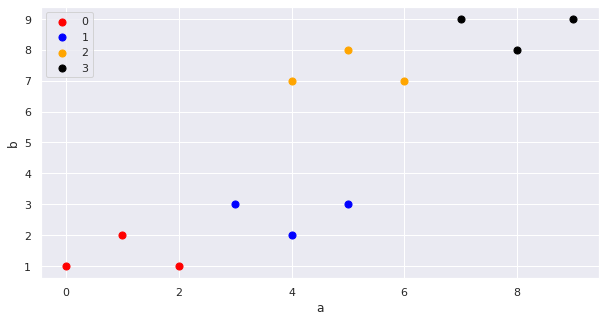

In [29]:
ax = X_dtc[y_dtc == 0].plot(kind='scatter', x='a', y='b', s=50, c="red")
X_dtc[y_dtc == 1].plot(kind='scatter', x='a', y='b', s=50, c="blue", ax=ax)
X_dtc[y_dtc == 2].plot(kind='scatter', x='a', y='b', s=50, c="orange", ax=ax)
X_dtc[y_dtc == 3].plot(kind='scatter', x='a', y='b', s=50, c="black", ax=ax)
ax.legend([0, 1, 2, 3])

### Step 2. Create the decision-tree classifier

Next, we create the _decision-tree object_ for **decision tree mining**,
and store it in the variable `dtm`.
We supply an upper bound on the tree depth as argument.

In [30]:
dtc = DecisionTreeClassifier(max_depth=3)

If you do not supply an upper bound,
then the decision tree will grow as far as is 'necessary' to get the best result.

A larger tree is not necessarily better. Large trees may **overfit**: produce good results on training data but poor results on test data.

### Step 3. Do the fitting

Invoke the **`fit()`** function of the decision-tree object,
supplying the selected data:

In [31]:
dtc.fit(X_dtc, y_dtc)

DecisionTreeClassifier(max_depth=3)

### Step 4.a. Extract model parameters

In case of decision tree mining,
the relevant attributes of the decision-tree classifier `dtc` are:

* **`dtc.tree_`** : the _mined decision tree_
  * **`dtc.tree_.node_count`** : the _number of nodes_ in the tree
  * **`dtc.tree_.max_depth`** : the _depth_ of the tree, that is, the maximum distance from the root to any leaf
* **`dtc.feature_importances_ `** : the _relative importance_ of each feature (explanatory variable)
* **`dtc.classes_`** : the _inferred target values_ for the given features  

It is convenient

* to visualize the tree (see Step 4.b)

* to convert the feature importances to a data frame
    with the same column labels as the original data

In [32]:
dtc.tree_.node_count, dtc.tree_.max_depth

(7, 2)

In [33]:
feature_importances = pd.DataFrame([dtc.feature_importances_], columns=X_dtc.columns)
feature_importances

,a,b
0,0.666667,0.333333


In [34]:
dtc.classes_

array([0, 1, 2, 3])

### Step 4.b. Visualize the model

Unfortunately,
creating a _graphical representation_ of a decision tree
(as shown in the image below) is [outside the scope of these lessons](http://scikit-learn.org/stable/modules/tree.html).

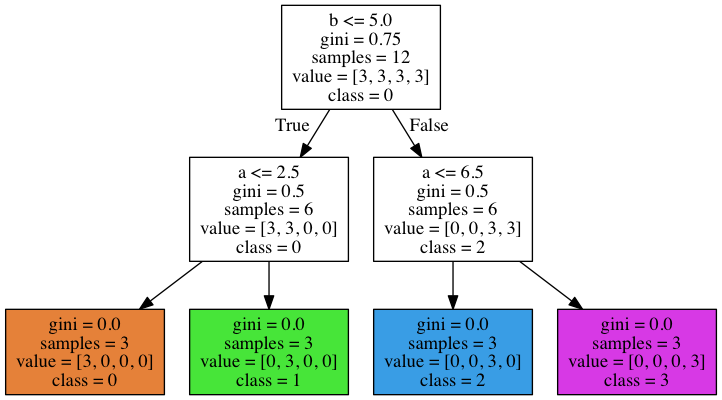

Instead, we use a (third-party) function **`tree_print()`**,
which is imported from `treeviz.py`,
to show a _textual representation_.

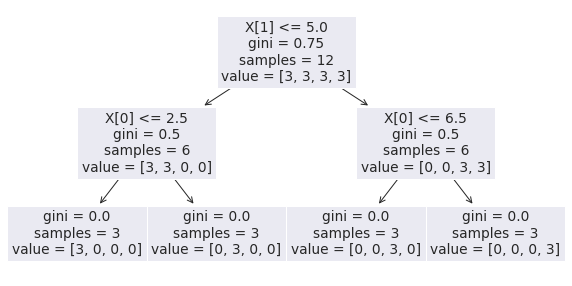

In [46]:
plot_tree(dtc);

Recall that we set `max_depth=3` when creating the decision-tree object.
Apparently, the target can be predicted fully with a smaller tree,
since the mined decision tree actually has only a depth of 2.

### Step 4.c. Assess the model's quality

The quality of a decision tree can be expressed as its _accuracy_,
obtained as follows:

In [47]:
dtc.score(X_dtc, y_dtc)

1.0

This score is at best 1.0 (100% correct),
and will drop towards 0.0 with less accuracy.

> **NOTE:** _Accuracy_ treats all errors in the same way.
When not all types of errors have the same impact
(think of _false positives_ versus _false negatives_),
accuracy is not a good measure.
In such cases, it is better to produce a _confusion matrix_
(see below).

### Step 5. Make predictions

Given one or more additional data points, you can find their predicted target value
with the function **`predict()`**.

Let's predict for the same points as we used for clustering.

In [48]:
#test_km

NameError: name 'test_km' is not defined

In [ ]:
#dtc.predict(test_km)

Check these predictions.

It may be helpful to consult the following plot
(its creation is beyond the scope of these lessons),
which shows the target (color) predicted by `dtm.predict()`
for all points in the plot area .

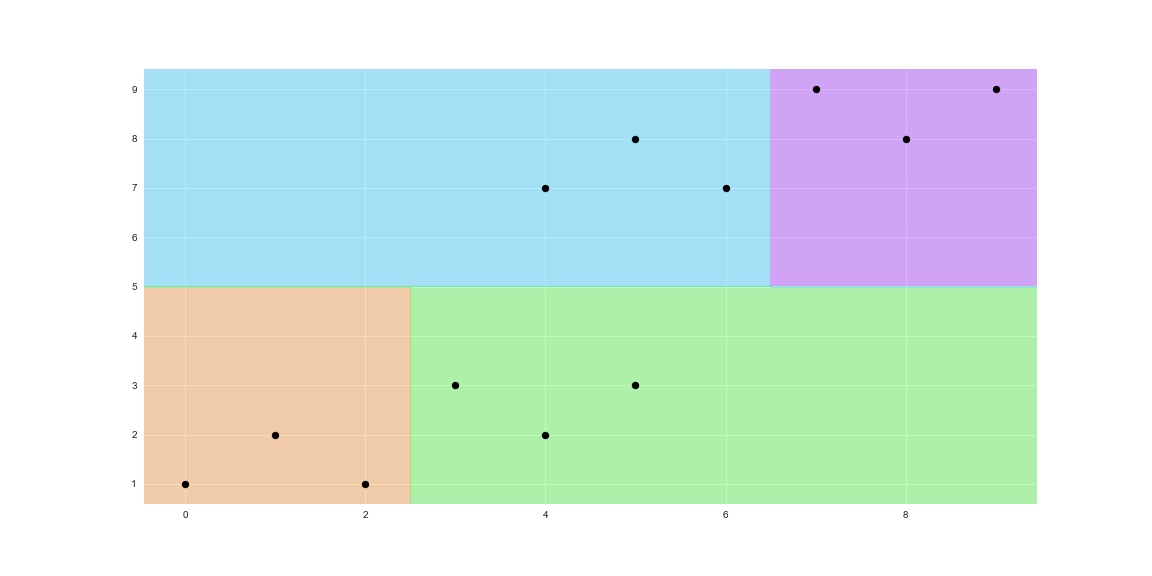

## Exercises on decision trees

Let us see if we can learn a decision tree to predict the origin of the cars in the Auto MPG data set.

### Exercise <span class="exercise" id="exercise-depth-three-tree">3.a</span>: Fit a decision tree

Fit a decision tree with **maximum depth of $3$** using the _training data set_ to predict the `'origin'` column. Perform the following steps:

**Step 1. Select the data**

* Assign the following list of column labels to `features`: `'mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year'`
* Assign the columns with the features above to `X_features`
* Assign the target column to `y_origin`

**Step 2. Create the decision-tree object**

* Assign the decision tree classifier to `dtc_depth_3`,

**Step 3. Fit the model**

**Step 4. Extract model parameters**

* Create a data frame `feature_importances_depth_3` with the _relative importance_ of feature

In [54]:
#// BEGIN_TODO [DMM_3a] Decision tree (3 points)

X_features = df_mpg[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']].copy()
y_origin = df_mpg['origin'].copy()

dtc_depth_3 = DecisionTreeClassifier(max_depth=3)
dtc_depth_3.fit(X_features, y_origin)

feature_importances_depth_3 = pd.DataFrame([dtc_depth_3.feature_importances_], columns=X_features.columns)
feature_importances_depth_3

#// END_TODO [DMM_3a]

feature_importances_depth_3

,mpg,cylinders,displacement,weight,acceleration,year
0,0.0,0.0,0.779813,0.169614,0.050572,0.0


### Exercise <span class="exercise">3.b</span>: Accuracy of the decision tree

Assess the quality of the decision tree on the training set by computing the accuracy. Assign your answer to the variable `acc_depth_3_train`.

In [55]:
#// BEGIN_TODO [DMM_3b] accuracy for a decision tree of depth <= 3 (2 points)

acc_depth_3_train = dtc_depth_3.score(X_features, y_origin)

#// END_TODO [DMM_3b]

acc_depth_3_train

0.7939698492462312

### Exercise <span class="exercise">3.c</span>: Representation of the decision tree

Show a textual representation of the decision tree.

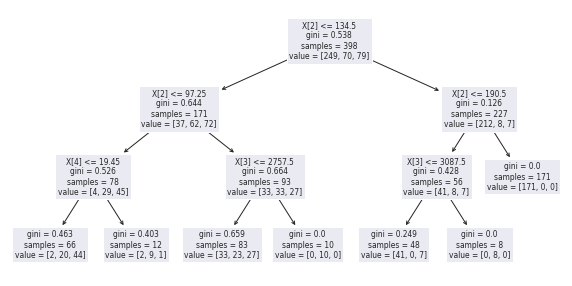

In [56]:
#// BEGIN_TODO [DMM_3c] Show a textual representation of decision tree (1 point)

plot_tree(dtc_depth_3);

#// END_TODO [DMM_3c]

### Exercise <span class="exercise">3.d</span>: Test-set accuracy

The obtained decision tree gives us a simple scheme to predict the origin of cars based on their features. Let us see how good these predictions are for the cars in the test set: Assess the quality of the decision tree by computing its accuracy for the _test set_. 

Assign:

* The relevant features from the test set to a data frame `X_features_test`
* The origins from the test set to a data frame `y_origin_test`
* your answer to the variable `acc_depth_3_test`.

In [57]:
#// BEGIN_TODO [DMM_3d] Test-set accuracy (1 point)

X_features_test = df_mpg_test[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']].copy()
y_origin_test = df_mpg_test[['origin']].copy()

dtc_test = DecisionTreeClassifier(max_depth=3)
dtc_test.fit(X_features_test, y_origin_test)

acc_depth_3_test = dtc_test.score(X_features_test, y_origin_test)

#// END_TODO [DMM_3d]

acc_depth_3_test

0.875

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2019 - **TU/e** - Eindhoven University of Technology